<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Regression Challenge
Notebook V

--- 
#### Production Model and Insights

This notebook will look into the production model I picked with more visualizations and insights generated through analysis. 

It contains contents as below:

- [Production Model Selection](#Production-Model-Selection)
- [Analysis, Findings and Insights](#Analysis,-Findings-and-Insights)
- [Conclusions](#Conclusions)
- [Limitations and Suggestions](#Limitations-and-Suggestions)

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pickle

In [2]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

train = pd.read_csv('../datasets/train_clean.csv')

### Production Model Selection

Although my two log transformation improved my model, I've decided to use the LASSO model for my presentation model to my audience - first time home buyers. I chose the lasso model for two reasons: 1. the goal of this project is to help my audience identify the features that have the most impact on the house sale price therefore it is important to treat the coefficients for all my features fair. Regularization models are best suited for serving this purpose; 2. although the RMSE score of the lasso model is not the best, the score, especially the local score, doesn't vary significantly; plus it has great R squared scores of over 90% which is comparable to the best performance model.

In [18]:
# pickle the model
pickled = pickle.load(open('../assets/lasso.pkl', 'rb'))


# define the features for visualizations
X = pd.read_csv('../assets/scaled.csv')
y = train['saleprice']

### Analysis, Findings and Insights

Upon deciding on my production model, in this part I would further evaluate my model and also try to identify the features that have the most significant impact on the sale price by looking at the coefficient magnitude generated by my model.

### Residuals Distribution

To examine the homoscedasticity, I'm plotting a chart to visualize the predicted values and the actual values.

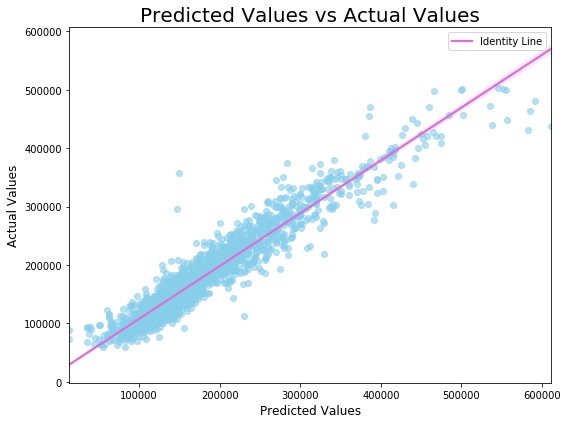

In [78]:
y_hat = pickled.predict(X)

# inspired by Charlie's lecture codes
plt.figure(figsize = (8, 6))
sns.regplot(y, y_hat, color = 'skyblue', line_kws = {'color': 'orchid'}, scatter_kws={'alpha':0.6});
plt.xlabel('Predicted Values', fontsize = 12);
plt.ylabel('Actual Values', fontsize = 12)
plt.title('Predicted Values vs Actual Values', fontsize = 20);
plt.legend(['Identity Line'])
plt.tight_layout()
plt.savefig('../charts/predvstrue.png');

As indicated by the above chart, within the $100,000 and $300,000 range of house price, my model shows good homoscedecity as the residuals were distributed evenly along the identity line. However distribution starts to fan out as the sale price go over $400,000, which could be explained by the less training data available in that range, as shown in the histogram of sale price. Futher studies are suggested to explore if the lasso model is a good fit for more expensive homes.

Next I'm looking into the coefficients of my model trying to understand the most important features that influence the house sale price. I'm sorting them by the absolute coefficient values but different the positive and negative values in the visualization.

In [73]:
# examine the coefficients
coef = pd.DataFrame(index = X.columns, data = pickled.coef_, columns = ['coefficient'])
coef['absolute_coef'] = abs(coef['coefficient'])
coef_abs = coef.sort_values(by = 'absolute_coef', ascending = False)

In [74]:
nbhd = [ind for ind in coef_abs.index if 'neighborhood' in ind]
subclass = [ind for ind in coef_abs.index if 'ms_subclass'in ind]
coef_num = coef_abs.drop(nbhd)
coef_num = coef_num.drop(subclass)[:10]

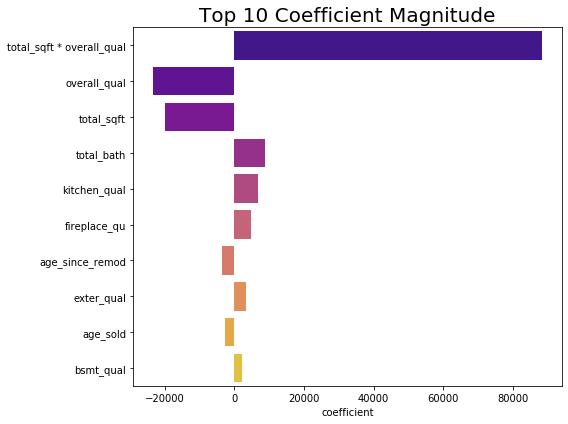

In [75]:
plt.figure(figsize = (8, 6))
sns.barplot(x = coef_num['coefficient'], y = coef_num.index, orient = 'h', palette = 'plasma')
plt.title('Top 10 Coefficient Magnitude', fontsize = 20)
plt.tight_layout()
plt.savefig('../charts/top10_coef.png');

The intersection of total square footage and overall quality has the strongest coefficient magnitude of all, which indicate a strong influence on the sale price. This is not surprising considering the reality. However, what surprises me is that these two features alone was assigned a relatively strong negative coefficient, which raises the question that if there is a turning point for these two features where the margin of the increased features starts to shrink or even has a reverse effect. This also requires further studies. 

Other top features make sense to me, quality, square footage -related features generally have positive influence on the sale price while age does the opposite. The result to some extent echoed the correlation result shown in the previous notebooks.

In [76]:
coef = coef.sort_values(by = 'coefficient', ascending = False)
coef_nbhd = coef.loc[nbhd, :][:10]

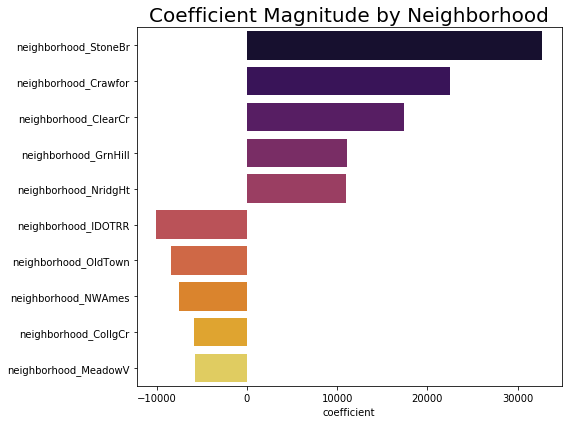

In [77]:
plt.figure(figsize = (8, 6))
sns.barplot(x = coef_nbhd['coefficient'], y = coef_nbhd.index, orient = 'h', palette = 'inferno')
plt.title('Coefficient Magnitude by Neighborhood', fontsize = 20)
plt.tight_layout()
plt.savefig('../charts/top10_nbhd.png');

As far as the location goes, Stone Brook seems to be the most expensive/ desirable neighborhood, followed by Crawford, Clear Creek, Green Hill, and Northridge Heights. The most budget-friendly neighborhoods were the ones who have the strongest negative coefficient magnitude. Top 5 of these neighborhoods are Iowa DOT and Rail Road,  Old Town, Northwest Ames, College Creek, and Meadow Village.

### Conclusions

The model I built can fit 92% of the testing data, and has a relatively low error score with around $22,000, which I believe is a useful predictive model in predicting the house sale price. For first time home buyers, features that need to give special consideration to are square footage-related, age-related, quality-related and location-related. Among them, the combined force of total square footage and overall quality have the most influence on the sale price. There might be good investment opportunities in those houses with unusual large square footage as the price are not necessarily as high as they should be, and by flipping the house to improve the overall quality score, the house may have a much greater value in future sale. If the home buyers are looking at more expensive homes, check out Stone Brook, Crawford, Clear Creek, Green Hill, and Northridge Heights neighborhoods. If the home buyers would like more affordable houses, Iowa DOT and Rail Road,  Old Town, Northwest Ames, College Creek, and Meadow Village are their best shots.

### Limitations and Suggestions

This project only scratched the surface of modeling possibilities with the data. Below are some limitations of the project:
1. Due to georaphic discrepancies, I don't believe this model is applicable to other regions especially those whose dollar amount for square footage is significantly higher than  
2. Since my model used lasso regularization, I standardized the data before fitting them to the model so as to keep them at the same scale. It helps making my coefficients more referencable, however, it also makes it hard for me to interpret the exact impact of each feature since they are not the original values anymore. 
3. Although a lot of efforts were made to reduce the number of features, my production model still has 60 columns counting all the dummfied variables. Seems to me still too many features. I would like to explore a more concise model that is as well-fit.
4. The model did not examine the statistical significance of the features selected. As a result, the result of some coefficient magnitude may be misleading. For example, there could be a neighborhood that has very few house information and their pattern of sale price could be very biased. Therefore I would suggest cross referencing the p-value with the coefficients.
5. My problem statement is focused on residentail homes. However the original training data contains non-residential type such as agricultural or industrial properties, which I didn't drop in consideration of the consistancy with the testing data. So for my next step, I would look into dropping these values to see if they will help improve the performance of my model.